In [17]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter

In [80]:
# Load the TSV file
column_names = ["pmid", "entity1_type", "entity2_type", "entity1_id", "entity2_id",
                "random_bool", "random_integer", "text", "correlation", "novel"]

df = pd.read_csv("processed2/train.tsv", sep="\t", header=None, names=column_names)

# Display first few rows to inspect the structure
print(df.head())


       pmid                entity1_type       entity2_type entity1_id  \
0  10491763           GeneOrGeneProduct     ChemicalEntity       3175   
1  10491763           GeneOrGeneProduct      OrganismTaxon       6927   
2  10491763  DiseaseOrPhenotypicFeature      OrganismTaxon    D003924   
3  10491763           GeneOrGeneProduct  GeneOrGeneProduct       3175   
4  10491763           GeneOrGeneProduct  GeneOrGeneProduct       3172   

  entity2_id  random_bool  random_integer  \
0    D005947         True               0   
1       9606         True               0   
2       9606         True               0   
3       6927        False               1   
4       6927         True               0   

                                                text correlation novel  
0  @GeneOrGeneProductSrc$ Hepatocyte nuclear fact...         NaN   NaN  
1  Hepatocyte nuclear factor-6 : associations bet...         NaN   NaN  
2  Hepatocyte nuclear factor-6 : associations bet...         NaN   NaN 

In [82]:
df["correlation"].fillna("None", inplace=True)
df["novel"].fillna("No", inplace=True)

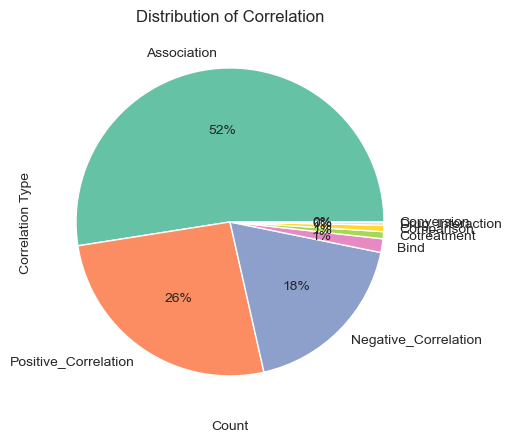

In [75]:
# Visualization 1 -- count of correlation
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
counts = df['correlation'].value_counts()
keys = list(counts.keys())
plt.pie(counts.values, labels=keys, colors=sns.color_palette('Set2') , autopct='%.0f%%') 
# sns.countplot(y=df["correlation"], hue=df["correlation"], order=df["correlation"].value_counts().index, palette="Set2")
plt.title("Distribution of Correlation")
plt.xlabel("Count")
plt.ylabel("Correlation Type")
plt.show()

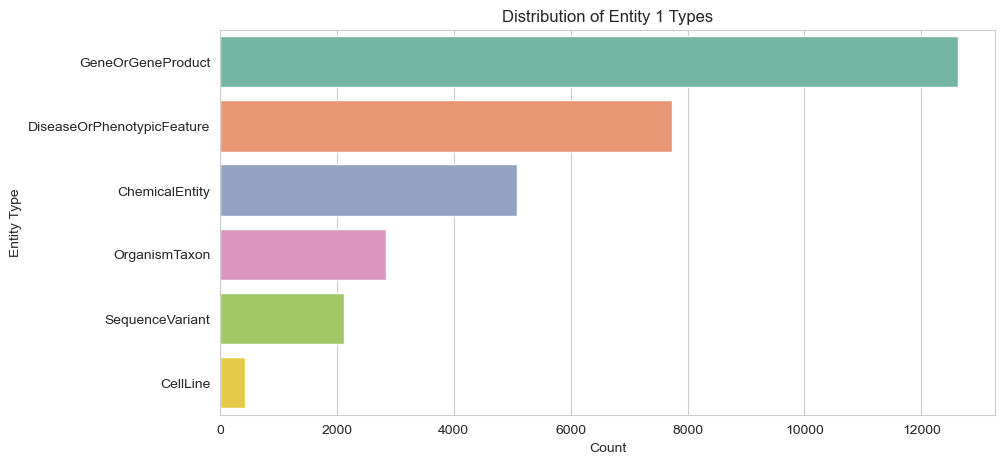

In [50]:
# Visualization 1 -- count of entity 1
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(y=df["entity1_type"], hue=df["entity1_type"], order=df["entity1_type"].value_counts().index, palette="Set2")
plt.title("Distribution of Entity 1 Types")
plt.xlabel("Count")
plt.ylabel("Entity Type")
plt.show()

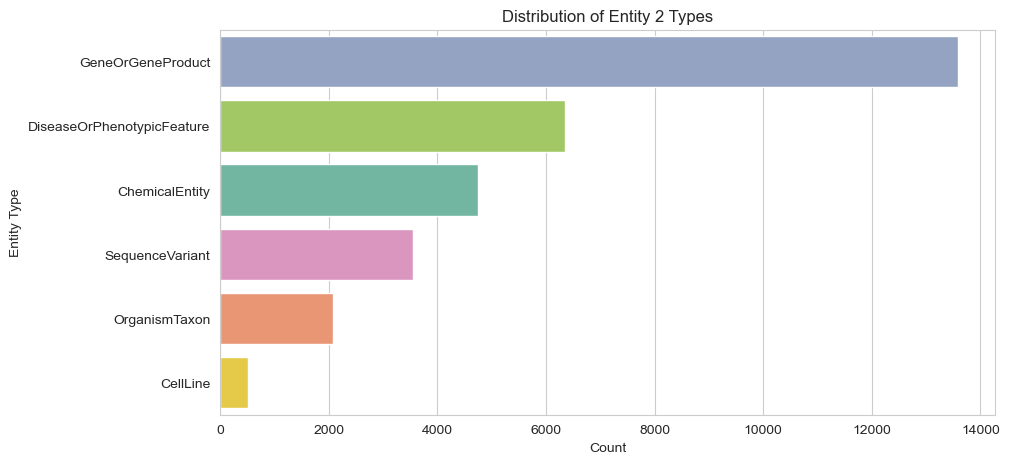

In [51]:
# Visualization 1 -- count of entity 2
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(y=df["entity2_type"], hue=df["entity2_type"], order=df["entity2_type"].value_counts().index, palette="Set2")
plt.title("Distribution of Entity 2 Types")
plt.xlabel("Count")
plt.ylabel("Entity Type")
plt.show()

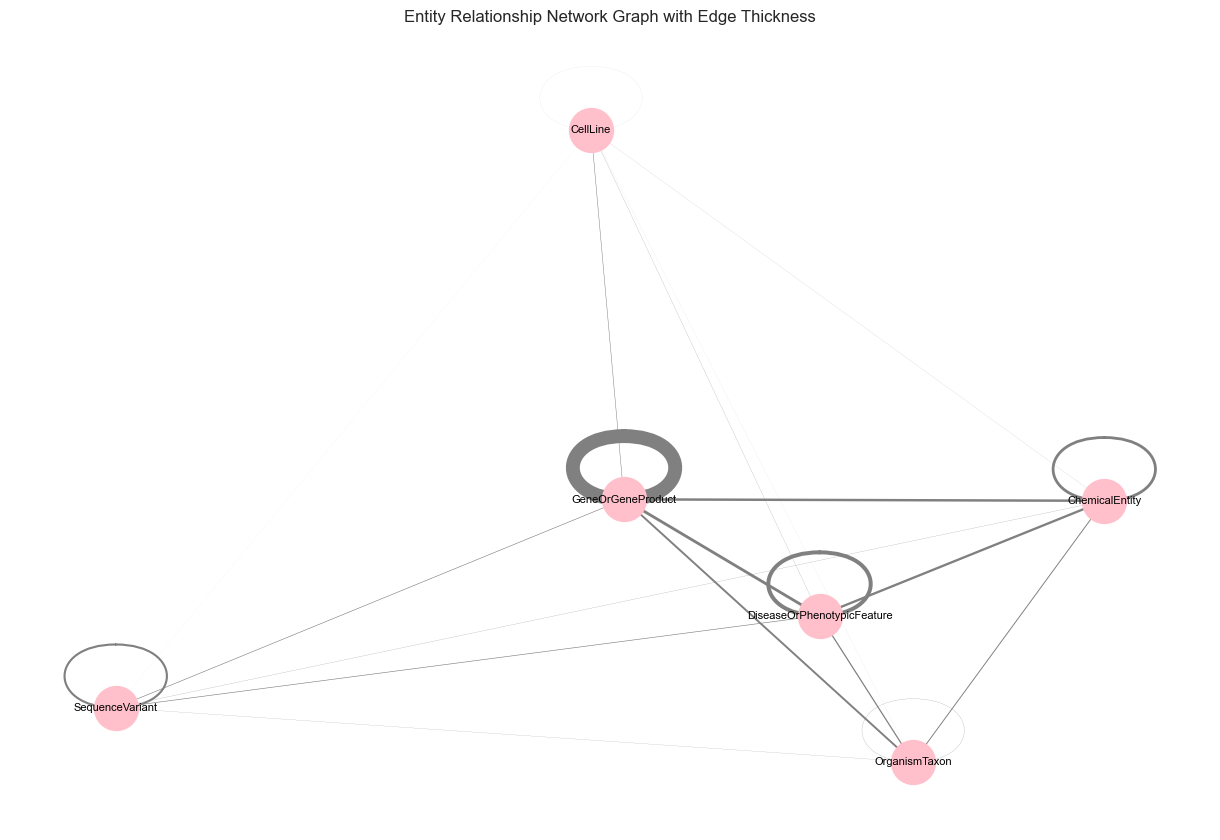

In [40]:
# Create graph object
G = nx.Graph()
entity_pairs = list(zip(df["entity1_type"], df["entity2_type"]))
pair_counts = Counter(entity_pairs)

# Add edges based on entity relationships
for (entity1, entity2), count in pair_counts.items():
    G.add_edge(entity1, entity2, weight=count) 

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Positioning for clarity

# Extract edge weights for thickness
edges = G.edges(data=True)
edge_widths = [d['weight'] / max(pair_counts.values()) * 10 for (_, _, d) in edges]  # Normalize thickness

nx.draw(G, pos, with_labels=True, node_size=1000, node_color="pink", 
        edge_color="gray", font_size=8, width=edge_widths)  # Adjust edge width

plt.title("Entity Relationship Network Graph with Edge Thickness")
plt.show()

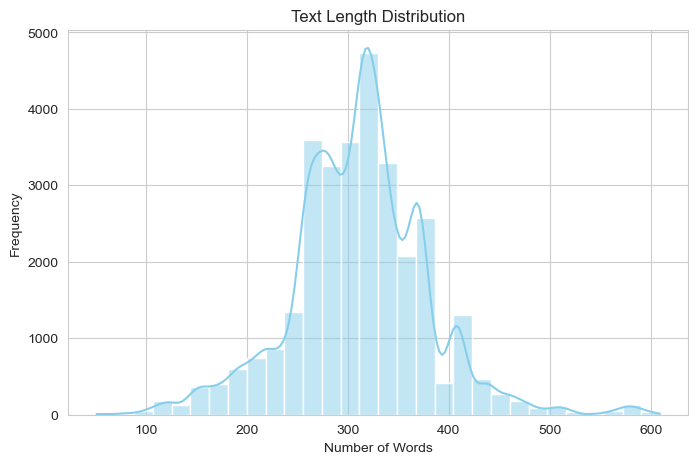

In [49]:
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(df["text_length"], bins=30, kde=True, color="skyblue")
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

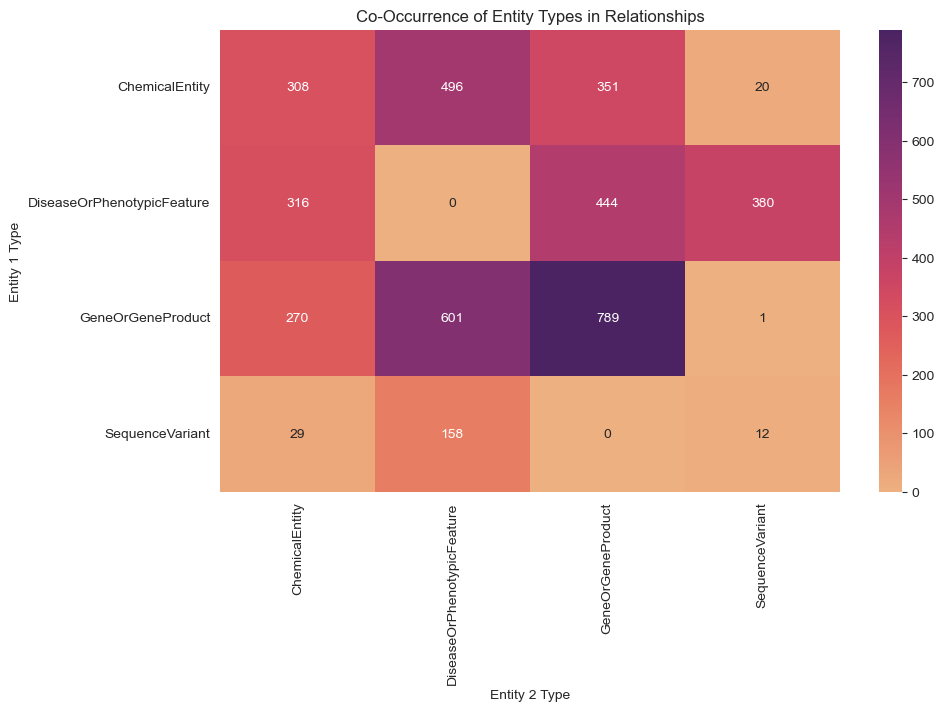

In [84]:
# Plot heatmap
new_df = df[df["correlation"] != "None"]
# print(new_df.head())

# Create a pivot table for entity1_type and entity2_type co-occurrences
co_occurrence_matrix = new_df.pivot_table(index="entity1_type", columns="entity2_type", aggfunc="size", fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(co_occurrence_matrix, annot=True, cmap="flare", fmt="d")
plt.title("Co-Occurrence of Entity Types in Relationships")
plt.xlabel("Entity 2 Type")
plt.ylabel("Entity 1 Type")
plt.show()

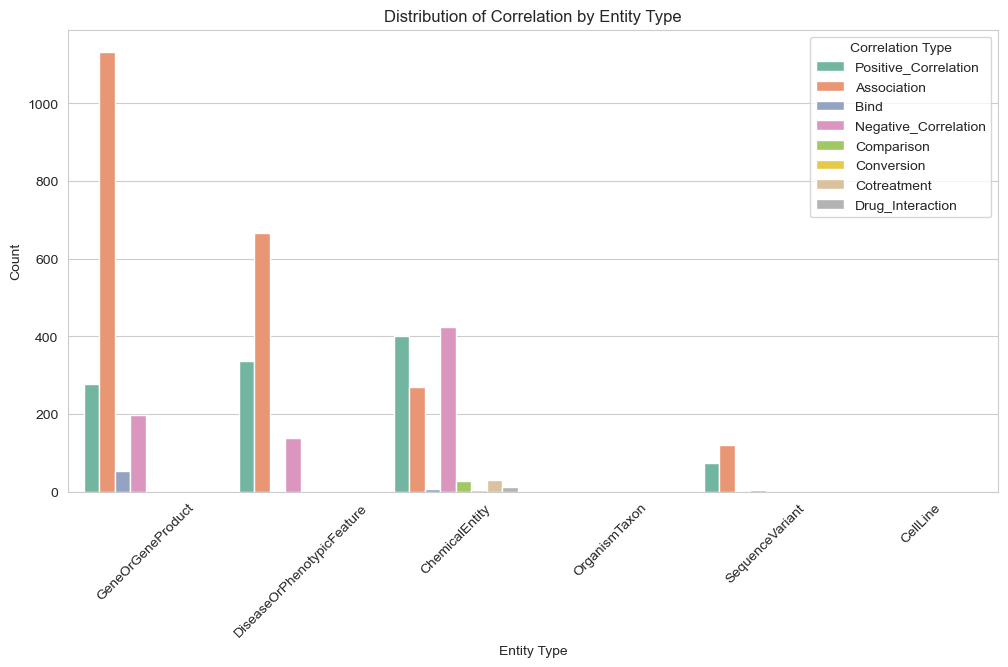

In [79]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="entity1_type", hue="correlation", palette="Set2")
plt.xticks(rotation=45)
plt.title("Distribution of Correlation by Entity Type")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.legend(title="Correlation Type")
plt.show()
